# Nome: Henrique Augusto Gomes Togo
# Matrícula: 231111280

## Questão 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definida uma função para calcular a distribuição gaussiana bivariada.

In [2]:
def bivariate_gauss(u, cov, x1, x2):
    var_1 = cov[0, 0]
    var_2 = cov[1, 1]
    rho = cov[0,1]/(np.sqrt(var_1) * np.sqrt(var_2))
    z_1 = (x1 - u[0])/np.sqrt(var_1)
    z_2 = (x2 - u[1])/np.sqrt(var_2)
    a = 1/(2 * np.pi * np.sqrt(var_1) * np.sqrt(var_2) * np.sqrt(1-rho**2))
    b = np.exp(-(np.power(z_1, 2) - 2 * rho * z_1 * z_2 + np.power(z_2, 2))/(2 * (1 - rho ** 2)))
    return a * b

São calculadas as distribuições bivaridas com os parâmetros fornecidos para cada classe. São plotados os pontos referentes às distribuições levando em consideração o vetor de médias, matriz de covariância e as probabilidades a priori.

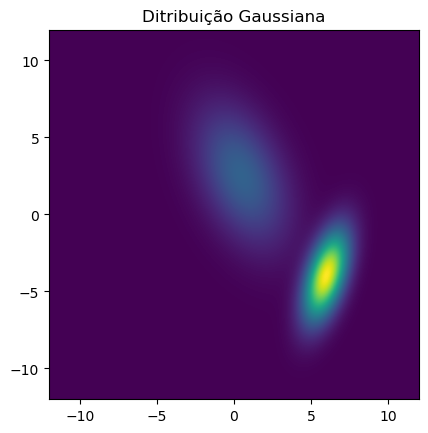

In [3]:
number_points = 500
min_lim = -12
max_lim = 12

x1 = np.linspace(min_lim, max_lim, number_points)
x2 = np.linspace(min_lim, max_lim, number_points)

u_0 = np.array([6, -4])
cov_0 = np.array([[1, 1], [1, 4]])
p_0 = 0.7

u_1 = np.array([0.5, 2.5])
cov_1 = np.array([[4, -2.4], [-2.4, 9]])
p_1 = 0.3

gaussian_0 = np.zeros((len(x1), len(x2)))
gaussian_1 = np.zeros((len(x1), len(x2)))

for i in range(len(x1)):
    for j in range(len(x2)):
        gaussian_0[number_points-1-i, j] = bivariate_gauss(u_0, cov_0, x1[j], x2[i])

for i in range(len(x1)):
    for j in range(len(x2)):
        gaussian_1[number_points-1-i, j] = bivariate_gauss(u_1, cov_1, x1[j], x2[i])

plt.imshow(gaussian_0 + gaussian_1, cmap='viridis', extent=[min_lim, max_lim, min_lim, max_lim])
plt.title('Ditribuição Gaussiana')
plt.show()

A seguir, são plotadas as amostras referentes a cada classe, com suas respectivas cores.

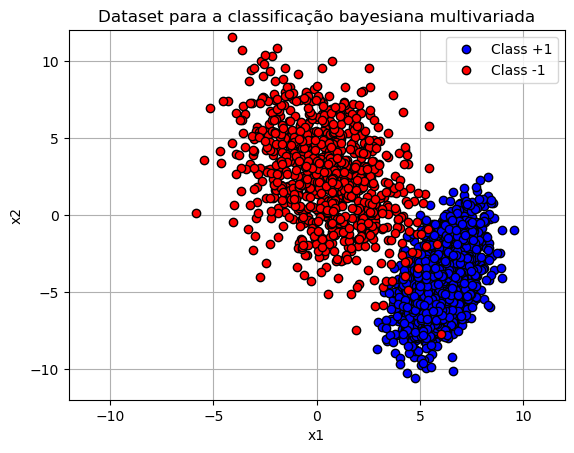

In [4]:
arr_bayesian = np.loadtxt("data_bayesian_question.csv", delimiter=",", dtype=float)
arr_0 = []
arr_1 = []
for i in range(len(arr_bayesian)):
    if (arr_bayesian[i, 2] == 1):
        arr_0.append(arr_bayesian[i])
    else:
        arr_1.append(arr_bayesian[i])

arr_0 = np.array(arr_0)
arr_1 = np.array(arr_1)

plt.plot(arr_0[:, 0], arr_0[:, 1], 'bo', markeredgecolor=(0, 0, 0, 1))
plt.plot(arr_1[:, 0], arr_1[:, 1], 'ro', markeredgecolor=(0, 0, 0, 1))
plt.legend(['Class +1', 'Class -1'])
plt.title('Dataset para a classificação bayesiana multivariada')
plt.xlim([min_lim, max_lim])
plt.ylim([min_lim, max_lim])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

Para verificar a consistência dos dados, estimou-se o vetor de média e as matrizes de covariância, apenas como curiosidade. Pode-se observar que eles são bem similares ao que foi fornecido pela questão.

In [5]:
u_0_estimated = np.array([np.mean(arr_0[:,0]), np.mean(arr_0[:,1])])
print(f'm_+1 = {u_0_estimated}')
u_1_estimated = np.array([np.mean(arr_1[:,0]), np.mean(arr_1[:,1])])
print(f'm_-1 = {u_1_estimated}')

N_0 = len(arr_0)
N_1 = len(arr_1)
s_matrix = np.zeros((2, 2))
print(40*'=')

S_0 = np.transpose(arr_0[:,0:2] - u_0_estimated) @ (arr_0[:,0:2] - u_0_estimated) / N_0
S_1 = np.transpose(arr_1[:,0:2] - u_1_estimated) @ (arr_1[:,0:2] - u_1_estimated) / N_1
print(f'S_+1 = {S_0}')
print(f'S_-1 = {S_1}')

m_+1 = [ 6.01532099 -3.97277296]
m_-1 = [0.45032738 2.5165626 ]
S_+1 = [[0.93651477 0.94347397]
 [0.94347397 3.9629914 ]]
S_-1 = [[ 3.99505972 -2.08750923]
 [-2.08750923  9.29767226]]


A seguir, é definida uma função para calcular as funções discriminantes. Calcula-se então, separadamente, para cada classe os valores da função discriminante no intervalo entre (-12, 12). 

In [6]:
def discriminant(x, m, s, p):
    return -0.5 * np.log(np.linalg.det(s)) - 0.5 * (x - m) @ np.linalg.inv(s) @ np.transpose(x - m)  + np.log(p)

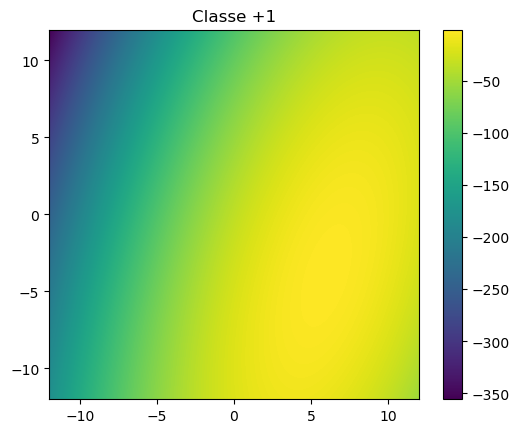

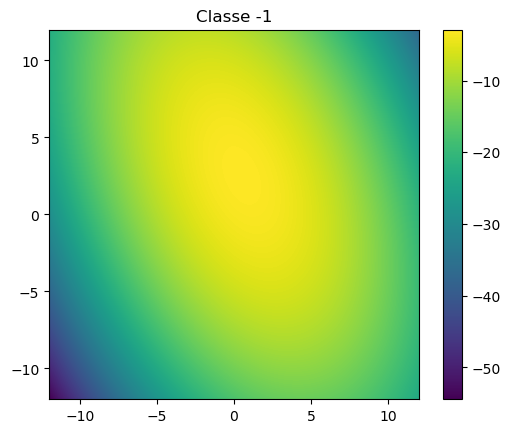

In [7]:
g_0 = np.zeros((len(x1), len(x2)))
g_1 = np.zeros((len(x1), len(x2)))

for i in range(len(x1)):
    for j in range(len(x2)):
        g_0[number_points-1-i, j] = discriminant(np.transpose([x1[j], x2[i]]), u_0, cov_0, p_0)
        
for i in range(len(x1)):
    for j in range(len(x2)):
        g_1[number_points-1-i, j] = discriminant(np.transpose([x1[j], x2[i]]), u_1, cov_1, p_1)

plt.imshow(g_0, cmap='viridis', extent=[min_lim, max_lim, min_lim, max_lim])
plt.title('Classe +1')
plt.colorbar()
plt.show()

plt.imshow(g_1, cmap='viridis', extent=[min_lim, max_lim, min_lim, max_lim])
plt.title('Classe -1')
plt.colorbar()
plt.show()

Nesse momento, é realizada a classificação seguindo as funções discriminantes. São plotadas as classificações das amostras com as respectivas cores de cada classe. É interessante comparar este gráfico com o que foi mostrado anteriormente (dados do dataset com os seus respectivos rótulos).

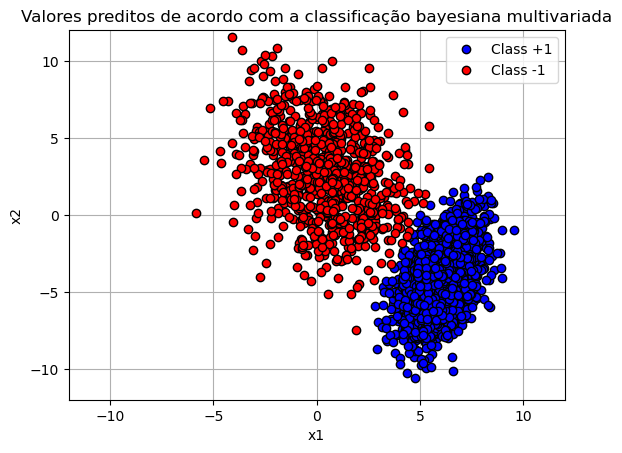

In [8]:
arr_0_predict = []
arr_1_predict = []

for i in range(len(arr_bayesian)):
    g_0_predict = discriminant(np.transpose(arr_bayesian[i, 0:2]), u_0_estimated, S_0, p_0)
    g_1_predict = discriminant(np.transpose(arr_bayesian[i, 0:2]), u_1_estimated, S_1, p_1)
    if (g_0_predict > g_1_predict):
        arr_0_predict.append(arr_bayesian[i])
    else:
        arr_1_predict.append(arr_bayesian[i])

arr_0_predict = np.array(arr_0_predict)
arr_1_predict = np.array(arr_1_predict)

plt.plot(arr_0_predict[:, 0], arr_0_predict[:, 1], 'bo', markeredgecolor=(0, 0, 0, 1))
plt.plot(arr_1_predict[:, 0], arr_1_predict[:, 1], 'ro', markeredgecolor=(0, 0, 0, 1))
plt.xlim([min_lim, max_lim])
plt.ylim([min_lim, max_lim])
plt.legend(['Class +1', 'Class -1'])
plt.title('Valores preditos de acordo com a classificação bayesiana multivariada')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

Para avaliar a performance do modelo, é calculada a taxa de erro, referente aos rótulos fornecidos.

In [9]:
error_0 = 0
error_1 = 0
for i in range(len(arr_0_predict)):
    if (arr_0_predict[i, 2] == -1):
        error_0 += 1
for i in range(len(arr_1_predict)):
    if (arr_1_predict[i, 2] == 1):
        error_1 += 1

print(f'Quantidade de erros para a classificação da classe +1: {error_0}')
print(f'Acurácia: {100*error_0/len(arr_0):.2f}%')
print(f'Quantidade de erros para a classificação da classe -1: {error_1}')
print(f'Acurácia: {100*error_1/len(arr_1):.2f}%')
print(f'Acurácia total: { 100 - (100 * ((error_0 + error_1) / len(arr_bayesian))):.2f}%')

Quantidade de erros para a classificação da classe +1: 21
Acurácia: 1.00%
Quantidade de erros para a classificação da classe -1: 1
Acurácia: 0.11%
Acurácia total: 99.27%


Como pode ser observado, o modelo erra, no total, 22 exemplos referentes ao dataset original, que possui um total de 3000 amostras. A acurácia final é de 99,27%

Por fim, é plotada a fronteira de decisão para o modelo, seguindo os parâmetros fornecidos.

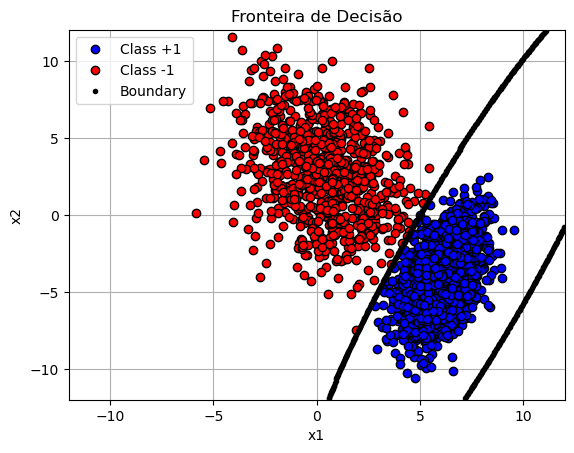

In [10]:
g_discriminant = g_0 - g_1

eps = 0.05

x = []
y = []

for i in range(len(g_discriminant)):
    for j in range(len(g_discriminant)):
        if((abs(g_discriminant[i, j]) < eps)):
            x.append(min_lim + (j * (max_lim - min_lim) / number_points))
            y.append(max_lim - (i * (max_lim - min_lim) / number_points))
            
plt.plot(arr_0_predict[:, 0], arr_0_predict[:, 1], 'bo', markeredgecolor=(0, 0, 0, 1))
plt.plot(arr_1_predict[:, 0], arr_1_predict[:, 1], 'ro', markeredgecolor=(0, 0, 0, 1))
plt.plot(x, y, 'k.')
plt.xlim([min_lim, max_lim])
plt.ylim([min_lim, max_lim])
plt.legend(['Class +1', 'Class -1', 'Boundary'])
plt.title('Fronteira de Decisão')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

Pode-se observar que a classificação adotada segue a fronteira da função discriminante. Para os pontos que se encontram dentro da linha preta, a classe predita é a +1, por outro lado, para os pontos externos a ela, a classe predita é a -1. Vale a pena destacar que o modelo treinado consegue distinguir bem as classes. Entretanto, ele não é perfeito, ao comparar com o gráfico dos dados fornecidos pelo dataset, é possível observar que ocorrem alguns erros na classificação.

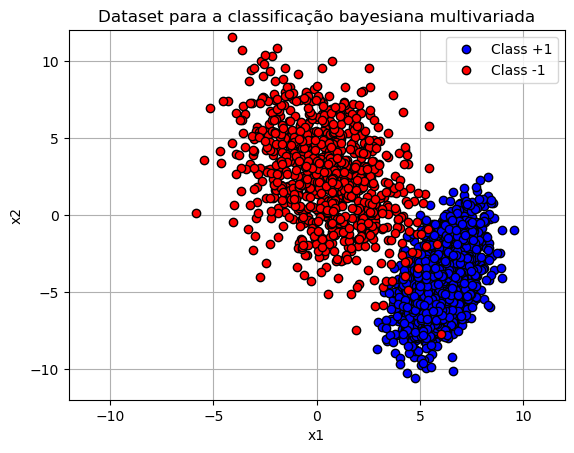

In [11]:
plt.plot(arr_0[:, 0], arr_0[:, 1], 'bo', markeredgecolor=(0, 0, 0, 1))
plt.plot(arr_1[:, 0], arr_1[:, 1], 'ro', markeredgecolor=(0, 0, 0, 1))
plt.legend(['Class +1', 'Class -1'])
plt.title('Dataset para a classificação bayesiana multivariada')
plt.xlim([min_lim, max_lim])
plt.ylim([min_lim, max_lim])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()